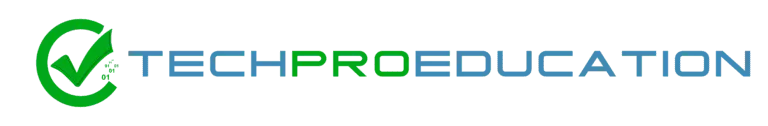

In [ ]:
#cümlenin tamami girilip, hem giderken hem dönerken hafizada tutma islemleri yapiyor, ve maskaleme islemi yaparak,
#her sefereinde farkli yerleri kapatarak kendine sorular sorarak ve ögreniyor, bu sekilde soru soruncada 
# güzel cevapliyor
# bidirectinal yöntemi ile de giderken ve dönerken ona göre karar veriyor Apple elma mi yoksa sirket mi
#eskiden sadece bir sagi soluna bakiyor du, burda cümlenin tamamindan bir anlam cikariyordu

In [ ]:
#kod olarak fazla kod var, bertin bu modulunu kullaniacaksan bu kodu kullanmalisin diye seyler var,
# kod bloklari var
# 

# Fine Tuning For BERT Models with TPU

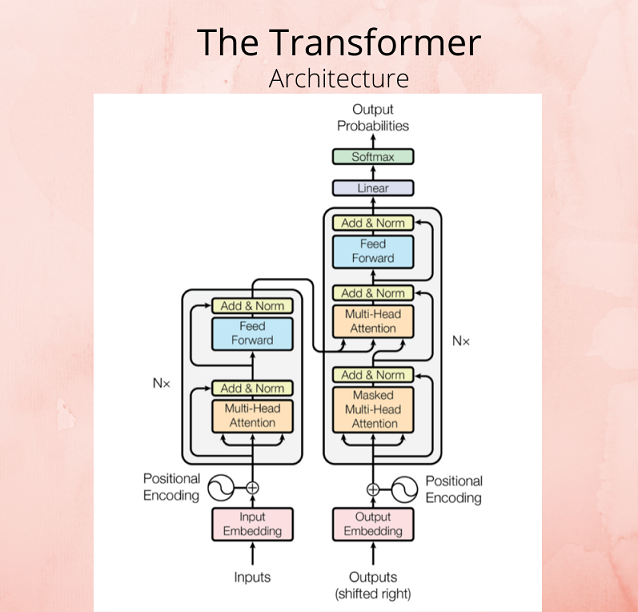

In [1]:
from google.colab import drive
drive.mount('/content/drive') #yetkilendirme 

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

# operation system klasörlerin yönetimi ile ilgili klasör
#TPU lari kullanmak icin bu kodlarida yaziyoruz
#ileriki asamalarda da girmeliyiz, colab icin yaziyoruz
#Tpu alacagin zaman pencereden save et,

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.71.10.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.71.10.122:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
strategy = tf.distribute.TPUStrategy(resolver)
# strategy ileriki asamada model icinde kullanacagiz
# kullanadigimiz TPU ile ilgili bilgiler veriyor
#burda trasformer teknolajisini kullanacagiz, önceden egitilmis modelleri kaullanma yöntemi

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [4]:
!pip install transformers

#pretrained modelleri kulanamak icin
#bunu yapacagimiz her türllü modelde kulanabiliriz, TPU kullanacaksan

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 59.7 MB/s 
     |████████████████████████████████| 596 kB 44.4 MB/s 
     |████████████████████████████████| 6.5 MB 41.4 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Import Library

In [35]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('/content/drive/MyDrive/hepsiburada.csv', encoding="utf-8")

In [37]:
df.head()

#Berti türkce icin kullanmaya calisacagiz
# bu pretrained modelleri kullanan insanlarin sayisi azdir, 
# CV lerine bunu koyabilirsin pretrained modeller kullanabiliyorum
# Resumeye projeler kismi olustur ve orda bunu orda yaz, büyük firmanin dataasini alip, Bert ile calistim

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [38]:
df.Rating.value_counts()

1    229821
0     13676
Name: Rating, dtype: int64

In [39]:
df.Rating = df.Rating.map({1:0, 0:1})
#target labeli 1 yaptik

#olumsuzlara egilmemiz gerekiyordu bu ypzden onlari degistirdik, negatifler 1 oldu pozitifler 0 oldu

In [40]:
df.Rating.value_counts()

0    229821
1     13676
Name: Rating, dtype: int64

In [11]:
X = df['Review'].values
y = df['Rating'].values

## Tokenization

### Fixing token counts of all documents

In [43]:
from transformers import AutoTokenizer   #siteden bunlari alin yaziyordu

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased") #bert'in türkce kismini aliyoruz,ingilizce alacaksan, ona göre islem yapacaksin
#cased büyük ve küsük harflerin beraber olmasi ,uncased kücük harfler 
#türkce karekterlerde zorluk cikmamasi icin cased aldik, 
max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True) #lower yapiyoruz,add_spreciel=True normal cümlelerin basinda ve sonuna özel tokenler ekleyen bir parametre ,o cümleleri birbirinden ayirmasi ici bunu kullaniyoruz, iki cümle ardarda gelince iki cümle arasindaki farki görebilmesi icin bu lazim
    max_token.append(len(input_ids))  #encode tokenize islemini bu yapiyor aslinda 

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids)) #maximum uzunlugu bulmak icin, yukarida =0 sectik,maximum 758 tokenlik bir sentence var,ama 512 den fazla olmamasi gerekir ,bert icin fazla

print('Max sentence length: ', max_len)

#tokenize islemi bu skeilde oluyor,yapisi biraz farkli
# https://huggingface.co/dbmdz/bert-base-turkish-cased
# türkce olarak kullandiigmiz sayfa
#urdaki amacimiz tokenize yapmak
# burda da sinirsiz ddegil, en fazla 512 secebiliyoruz, diger notebookta en fazla 61 almistik
#burda corpus'u tokenize yaptik

Token indices sequence length is longer than the specified maximum sequence length for this model (758 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  758


In [ ]:
text = "Ankara Türkiye'nin başkentidir.".lower()
 
tokenizer.tokenize(text)

#burda parca parca ayiriyor dir bile ayirmis, baskenti' dir 

In [45]:
sentence = "Ankara Türkiye'nin başkentidir".lower()
tokens = tokenizer.encode(sentence, add_special_tokens=True)
print(tokens)
print(len(tokens))

#burda encoder 
# add speciel token -,cümlelerin önune ve sonuna sayiar koyuyor
#2 ve sondaki 3, cümle ile baglantisi olmayan sayilar, 
# vu sékilde cümle sayisal olarak parcalanmis oldu

[2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3]
9


In [46]:
sentence = "Ankara Türkiye'nin başkentidir".lower()
tokens = tokenizer.encode_plus(sentence, add_special_tokens=True)
print(tokens)

#encode_plus extra bir encode yapiyor, input_ids yukaridakinin aynisi oluyor,ve sonra token_type_ids ve alttakiler 
#extra veriyor plus, token type ids, cok kullanmayacagiz, classificationda kullanmiyoruz, translationda ve bir sonraki cümleyi tahmin ederken kullaniiyor,burda bize lazim degil
# attention mask kullanacagiz, attention bosluk gördügü kisimlari dolduruyor
# burdaki amacimiz matris haline getirmeye calisiyoruz
# altaki ciktilarin her biri bir byout yani topmalda 3 byout var input ids ile beraber

#ML DL yapmadigimiz bisey yapiyoruz, uc tane vector cikariyorz,sonra tensor haline getirecez dedi hoca 
# attentionda sayilara bir digerlerine 0 veriyor
# burda 512 olabilir diye 512 in hepsini secmek mantikli degil, 130, 140 ta bazen mean'e göre mantikli olabilir

{'input_ids': [2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [47]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 10)
print(sum(np.array(list) < 10))


[ True False  True  True False False]
3


In [48]:
np.array(max_token).mean()
#bu skeilde mean 36 imis, biz bur hemen 512 full kapasite yaparsak, uzun sürer, 

36.4837390193719

In [49]:
sum(np.array(max_token) < 160) / len(max_token)

#mesela 160 yazinca sentencelerin %98 sini almis oluyoruz, iyi gibi % 2lik kayip icin 512 vermiyoruz, cünmkü 512 verince 50 nin geriye kalan 400 küsürlük saiysal kismini kendi dolduracak

0.9877000537994308

In [50]:
def transformation(X):
  # set array dimensions
  seq_len = 160  #160 tan sonra kes
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len)) #burda kendisine bir alan olusturuyor, 0 lar koyarak bir alan olusturuyor,amacimiz matris ve sonrasinda küp gibi tensor olusturmak
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,  #truncation kesmek icin
                                      padding='max_length', add_special_tokens=True) #encode plus. yukaridaki 3 boyut ortaya cikiyor
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [51]:
Xids, Xmask = transformation(X)

In [52]:
Xids.shape
#burda veri boyutumuz, ve 160 tan kesmistik
#bu add_specieldeki fazla cikan boyutlar

(243497, 160)

In [53]:
Xmask.shape
# 

(243497, 160)

In [54]:
sentence = "Ankara Türkiye'nin başkentidir.".lower()
tokens = tokenizer.encode_plus(sentence.lower(), max_length=20, truncation=True,
                                      padding='max_length', add_special_tokens=True)
print(tokens)

{'input_ids': [2, 14192, 5364, 2031, 9204, 9025, 13780, 35, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [55]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [56]:
Xids
#160 a kadar token olmayan yorumlari sifir ile dolduruyor
#bu bir boyut alttakide bir boyut bunlar bu sekilde modele hazirliyoruz

array([[2.0000e+00, 2.3000e+01, 5.1420e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.3000e+01, 5.1420e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.7820e+03, 3.1200e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 3.8070e+03, 9.2500e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 3.1560e+03, 4.1650e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.6807e+04, 1.9870e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [57]:
Xmask
# burda da bu sekilde 

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [ ]:
# from tensorflow.keras.utils import to_categorical

# l = np.array([1, 0, 2, 3, 4])
# to_categorical(l, 5) 

In [58]:
np.array([1, 0, 1, 0, 0]).reshape(-1,1) #reshape(5,1)

#burda birer boyut ekliyor

array([[1],
       [0],
       [1],
       [0],
       [0]])

In [60]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
labels = y.reshape(-1,1)
labels
#input sayisini bilemedigimiz zamanlarda kendi kac input oldugunu otomatikmen aliyor

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [65]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))
dataset

#dataseti olusturmaya calisiyoruz,iki ayri data degilde iciice data oldu Xids ve Xmask bunlar input, labels'i ise output olarak alabiliriz



<TensorSliceDataset element_spec=(TensorSpec(shape=(160,), dtype=tf.float64, name=None), TensorSpec(shape=(160,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [120]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):  #bunlari bir fonksiona verecegiz
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels  #burda bir dictinaory yapii yapiyoruz, outputlar disinda kaliyor, bunu sözlük icinde vermezsen hata aliyor

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

#

In [121]:
dataset

#asagida aciklamalari var, 160 datayi kestigimiz yer, label kismi Tensorspec=1 bir cikti vardi
#bert modeline girmesi icin Xmask Xids olmasi gerekiyordu ve label in ise 0,1 tarzi seklinde olmasi gerekiyor

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(160,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(160,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## Train Test Split

In [122]:
batch_size = 32

# shuffle and batch
# fit into a batch of 32
dataset = dataset.shuffle(243500, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

#burda farkli batc_size ilk asamada veriyoruz,data setiolustururken veriyoruz,yani train test split asamasinda veriyoruz
# bert modlelerinde 16, ve 32 batc tavsiye edilir,32 de overfitting olursa 16 yi alabilirsin
# data setini yukaridan aldik 243497 lik datamiz, burda 243500 yazdik, burda shuffle ile kariyor, ve kararken bütün datalara ulassin,genelde datadan biraz fazla yazilir,yani satir sayisindan biraz fazla olsun denir, 5 ile 100 araliginda bir rakam verin 500bin ise üstüne 10 koy :)

#reshuffle each False olmali,  test ile traini birbirine karistirmamasi icin False olmasi gerekiyor,
#drop_remainder kacli paketler verilecegini bir sonrakinde hatirlamasi icin Treu olmali

In [123]:
dataset

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(32, 160), dtype=tf.float64, name=None)}, TensorSpec(shape=(32, 1), dtype=tf.int64, name=None))>

In [124]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

#data setinin bölünmesi , 

In [72]:
print(len(dataset))
print(len(dataset)*0.9)
print(int(len(dataset)*0.9))

#bunlar kacli paketler halinde olmasi ile ilgili 32x7609 carparsan stir sayimizla ayni cikacak galiba
# 

7609
6848.1
6848


In [74]:
Xids.shape

(243497, 160)

In [75]:
#batch_size=32
int(Xids.shape[0]/batch_size)

#32 serli paketlerle girecek ve 7609 iteration olacak
#burda traini batclere böldügümüz icin iteration sayisi cikti ve datanin %10 nu validation icin ayirdik

7609

## Adamw optimization

In [78]:
!pip install -q tf-models-official   #optimization islemi icin

In [ ]:
len(train_ds)

In [125]:
from official.nlp import optimization 
epochs = 1  #genelde epochlar 1,2,3 alinir, 4 alinamaz galiba, bir epoch normal bilgisayarda 180 saat sürüyormus,parametre sayisi fazla oldugu icin ,asagida varmis 110 milyon parametre varmis, 
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps) #train icinden aldigi validaton bölümü olarak degerlendirebiliriz

init_lr = 2e-5  # 3e-5, 5e-5 #initial learning rate aslinda, lr adimlarin uzunlugu, burda basari burdaki 2e-5  # 3e-5, 5e-5 syilarda cikiyor 

optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps, #yukarida tanimladigimiz bölümler bunlarla optimizatin saglaniyor, en düsük validation hesaplamak icin
                                          optimizer_type='adamw')   #normal adam sonuna weight koymuslar,bunu weight olmadanda yapabiliyoruz,
             #adam ve adamweight birbirine yakin scorlar cikiyor,  
                                           

![](2022-11-28-21-12-35.png)

In [ ]:
#su ana kadar bert kullanmadik biz kendi trainimizi olustrduk
#modeli kurarken Bert kulaniyoruz, embeding asamasinda kullaniyoruz
#bit bert yokmuscasina datamizi hazirlayacaz,
# tam modlee sokacakken bert te modlee dahil olacak ve o kendi hazinesinde ki bilgilerle hem train hemde test bölümüne yardimci olacak

## Creating Model

In [127]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("dbmdz/bert-base-turkish-cased") #türkce modlein adi,enbatada yaziyordu
    input_ids = tf.keras.layers.Input(shape=(160,), name='input_ids', dtype='int32') #yukaridaki input_ids si burda kullanacagiz, ve altindada atention mask kullaniyoruz,type kesin int32 olmasi gerekiyor
    attention_mask = tf.keras.layers.Input(shape=(160,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]  #pooler output 
    #bert burda devreye giriyor, datamizi aliyor

    x = tf.keras.layers.Dense(160, activation='relu')(embeddings) #burda bir üsteki berti buraya koyduk,kendi ögrendiklerini burda uyguluyor, bizim trainimizde olmayan birsey testen geldiginde burda devreye girebiliyor
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) # 0.1 ve 0.2 tercih ediliyor genelde
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

    #burda bir fonksiyon olusturduk


In [128]:
with strategy.scope():  #yukarida strategi TPU icindi
  
  optimizer = optimizer #tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08)
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall() #recal kullansin
  model3 = create_model() #yukarida kurdugumuz fonksiyon galiba
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-turkish-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#pd.Series(y).value_counts(normalize=True)

0    0.943835
1    0.056165
dtype: float64

In [ ]:
#weights = {0:0.05, 1:0.95}

In [129]:
model3.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 160)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 160)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  110617344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 160,                                         

In [ ]:
#110 milyon parametre bundan dolayi epochlar fazla sürüyor,bertten yaklasik 100 milyon parametre geliyor

In [130]:
history = model3.fit(
    train_ds, validation_data= val_ds, #bunlarida yukarida belirlemistik
    epochs=epochs)

    #burda fit ediyoruz,yukaridaki model3 ü,  
    #epoch=1 diye atamistik,
    

6848/6848 [==============================] - 670s 87ms/step - loss: 0.0902 - recall_5: 0.6676 - val_loss: 0.0623 - val_recall_5: 0.7718


## Model evaluation

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = []
for i in val_ds:
  for j in np.array(i[1]):  # eger hata alince burasi 0 yazilabilir
    y_test.append(j)

print(classification_report(y_test, y_pred))

#bir üstteki degerler yeterli deniyor, ve bunu yapmak tavsiye edilmiyor, gerek yok deniyor
#%77 iyi basari diyebiliriz, cünkü gercek data  ve 0 ile 1 arasinda 10 kat oran vardi,imbalance'di


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22928
           1       0.89      0.77      0.83      1424

    accuracy                           0.98     24352
   macro avg       0.94      0.88      0.91     24352
weighted avg       0.98      0.98      0.98     24352



In [132]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = []
for i in train_ds:
  for j in np.array(i[1]):
    y_train.append(j)

print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    206884
           1       0.93      0.82      0.87     12252

    accuracy                           0.99    219136
   macro avg       0.96      0.91      0.93    219136
weighted avg       0.99      0.99      0.99    219136



In [115]:
for i in val_ds:
  print(np.array(i[1]))
  break

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


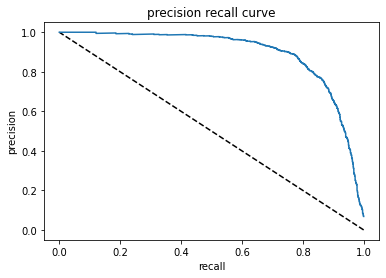

In [168]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [169]:
average_precision_score(y_test, y_pred_proba)

0.8937896633491915

In [133]:
model3.save("sentiment_model_without_weighted.h5")

In [ ]:
!pip install -q tf-models-official

In [134]:
import tensorflow as tf
import official.nlp.optimization as adamw
from tensorflow.keras.models import load_model


model4 = load_model('/content/drive/MyDrive/sentiment_model_without_weighted.h5', custom_objects={'AdamWeightDecay':adamw.AdamWeightDecay})

In [135]:
# initialize tokenizer from transformers
from transformers import AutoTokenizer, TFAutoModel

tokenizers = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

def prep_data(text):
    # tokenize to get input IDs and attention mask tensors
    tokens = tokenizers.encode_plus(text.lower(), max_length=160,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True,
                                   return_tensors='tf')
  
    return {'input_ids': tokens['input_ids'],      #tf.cast(tokens['input_ids'], tf.int32)
            'attention_mask': tokens['attention_mask']} #tf.cast(tokens['attention_mask'], tf.int32)

In [162]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
review15 = "alınca anlarsın anyayı konyayı"
review16 = "çöpe atacak paran varsa alabilirsin"
review17= "Telefon fena değil"
review18 = "al da gününü gör"
review19 = "Ürün süper ama satıcı ve kargo berbat"
review20= "kargo süper ama ürün berbat"
review21 = "Aldigim TV cok kaliteli diye dusunmustum, sonradan cok da iyi bir TV olmadigini dusundum, ama neyse yine de memnunum."
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14, review15, review16, review17, review18, review19, review20, review21]

In [163]:
probs = []
for i in reviews:

  in_tensor = prep_data(i)

  prob = model4.predict(in_tensor)[0][0]

  probs.append(prob)

In [164]:
probs

[0.0003810227,
 0.0005427003,
 0.9920132,
 0.0007711947,
 0.64404666,
 0.9890535,
 0.00067192316,
 0.9847493,
 0.0004197657,
 0.9918319,
 0.00061059,
 0.023808539,
 0.9538698,
 0.004017502,
 0.005593151,
 0.08763188,
 0.24691695,
 0.004234612,
 0.019344598,
 0.9161774,
 0.0068587065]

In [165]:
classes  = (np.array(probs) >= 0.5).astype("int")
classes

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [166]:
my_dict = {"Review":reviews, "prob":probs, "classes":classes}

In [167]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(my_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Review,prob,classes
0,çok beğendim herkese tavsiye ederim,0.000381,0
1,süper ürün aynı gün elime geçti,0.000543,0
2,büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım,0.992013,1
3,kelimelerle tarif edilemez,0.000771,0
4,tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten,0.644047,1
5,hiç resimde gösterildiği gibi değil,0.989053,1
6,kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler,0.000672,0
7,hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum,0.984749,1
8,tam bir fiyat performans ürünü,0.000420,0
9,beklediğim gibi çıkmadı,0.991832,1


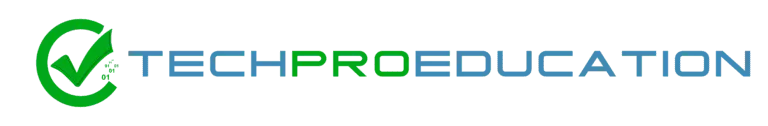